<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task2(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load libraries
import numpy as np # numerical python for ND array
import matplotlib.pyplot as plt # to make plots and show images
import os

Mounted at /content/drive


In [2]:
####### Read raw file 
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            #print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, bands, lines)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     

# part 1
Open VIS and IR images of painting Madonna with Two Saints


-Open both in Colab, generate gray scale and RGB preview

In [3]:
path = '/content/drive/MyDrive/ASI/savedata/paintings_Madonna_with_two_0015/capture'
[vis_raw, vis_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
[samples, bands, lines, waves] = read_hdr(vis_hdr)

2144 540 2253


In [19]:
# Read raw
fopen = open(vis_raw, "rb")
vis_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
fopen.close()

spectral_image.shape:  (2253, 540, 2144)


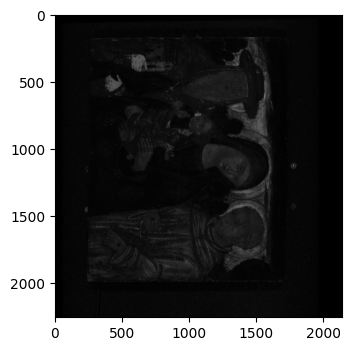

In [50]:
spectral_image = np.reshape(vis_image, (lines, bands, samples))
# save ram
# spectral_image = full_image[500:1500,:,500:1500]
print('spectral_image.shape: ', spectral_image.shape)
plt.rcParams['figure.dpi'] = 100 # Resolution
# show gray scale slice of 3D spectral image
plt.imshow(spectral_image[:,200,:], cmap='gray')
plt.show()

# del vis_image
# del full_image
# gc.collect()

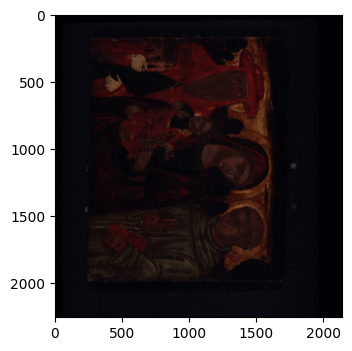

In [8]:
# preview plot RGB image -- 630 nm for red, 532 nm for green, and 465 nm for blue light
vis_RGB = np.empty((2253, 2144, 3)) 
# We go to hdr file and select channels
ch_1 = 250 # Wavelength 630.95nm
ch_2 = 171 # Wavelength 531.59nm
ch_3 = 100 # Wavelength 443.68nm
vis_RGB[:,:,0] = spectral_image[:,ch_1,:]/np.amax(spectral_image[:,ch_1,:]) # RGB in range [0,1]
vis_RGB[:,:,1] = spectral_image[:,ch_2,:]/np.amax(spectral_image[:,ch_2,:])
vis_RGB[:,:,2] = spectral_image[:,ch_3,:]/np.amax(spectral_image[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(vis_RGB)
plt.show()


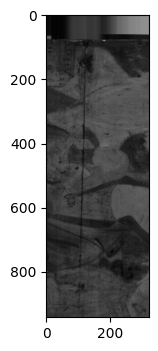

In [9]:
# IR image 
irpath = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.raw'

fopen = open(irpath, "rb") # Open file to read in Python
irraw = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file
#print(irraw.shape) # print shape of 1D array we have read

samples = 320
bands = 256
lines = 943
spectral_image_ir = np.reshape(irraw, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case
np.rot90(spectral_image_ir)
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image_ir[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image , vmin=0, vmax=1255
plt.show()

In [10]:
hdr_path_ir = '/content/drive/MyDrive/ASI/savedata/IR_IR1_0019/capture/IR_IR1_0019.hdr'

f=open(hdr_path_ir, "r")
filelines_ir = f.readlines()
f.close()
#print(filelines)
for fileline in filelines_ir:
    # read waves   
    n = 0
    for fileline in filelines_ir:
        if 'th = {' in fileline.lower():
          
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    wavelengths_ir = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        wavelengths_ir[n] = float(filelines_ir[i].replace(',',''))
        #print(waves[n])
        n = n + 1 
# for i in range(len(wavelengths_ir)):
#   print(f"{i}:-{wavelengths_ir[i]}nm")
          


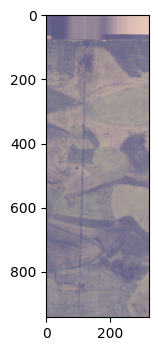

In [11]:
# preview plot RGB image(false color)
ir_RGB = np.empty((943, 320, 3)) 
# We go to hdr file and select channels
ch_1 = 90 
ch_2 = 140 
ch_3 = 210 
ir_RGB[:,:,0] = spectral_image_ir[:,ch_1,:]/np.amax(spectral_image_ir[:,ch_1,:]) # RGB in range [0,1]
ir_RGB[:,:,1] = spectral_image_ir[:,ch_2,:]/np.amax(spectral_image_ir[:,ch_2,:])
ir_RGB[:,:,2] = spectral_image_ir[:,ch_3,:]/np.amax(spectral_image_ir[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(ir_RGB)
plt.show()


-Consider white sample from the Capture folder and try to make white correction based on single white spectrum

2144 540 442


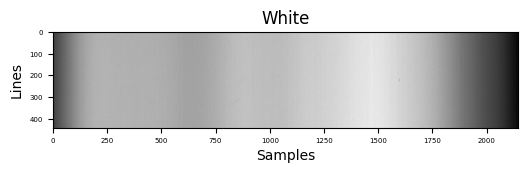

2144 540 100


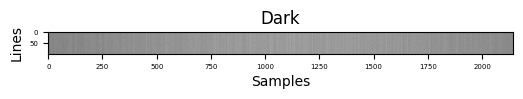

In [12]:
###############################################
# Read White
[samples, bands, lines, waves] = read_hdr(white_hdr)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = np.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 100
plt.imshow(white_image[:,100,:], cmap="gray")#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = np.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 100
plt.imshow(dark_image[:,200,:], cmap="gray", vmin=0, vmax=2)#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


(442, 540, 2144)
(540, 2144)


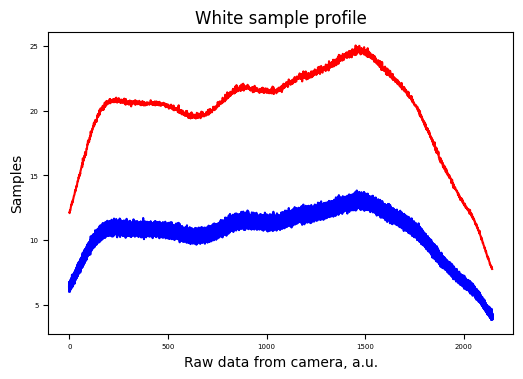

In [13]:
print(white_image.shape)
for i in range(1,200):
  plt.plot(white_image[i,100,:],'b')

white_av = np.sum(white_image, axis = 0)/234 # get average for White
print(white_av.shape)
plt.rcParams['figure.dpi'] = 200
plt.plot(white_av[100,:],'r')
#plt.yticks(range(0, 190, 10))
plt.title("White sample profile")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Raw data from camera, a.u.')
plt.ylabel('Samples')
plt.show()

plt.show()

In [14]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = np.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = np.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = np.zeros((lines, bansd, samples), dtype=np.float32)
spectral_cube = np.zeros((lines, bansd, samples), dtype=np.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = np.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = np.subtract(white_av, dark_av) 

# Spectral_cube = upper_part/lower_part
for i in range(lines):
  spectral_cube[i,:,:] = np.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube


(2253, 540, 2144)


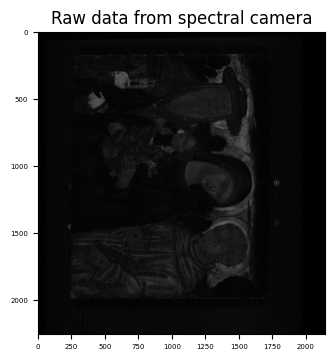

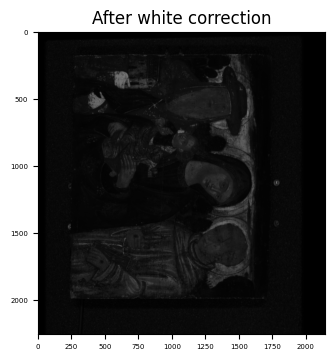

In [34]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 100
plt.imshow(spectral_image[:,200,:], cmap="gray", vmin=0, vmax= 40000)#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,200,:], cmap="gray", vmin=0, vmax= 1)
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


630.95
531.59
443.68


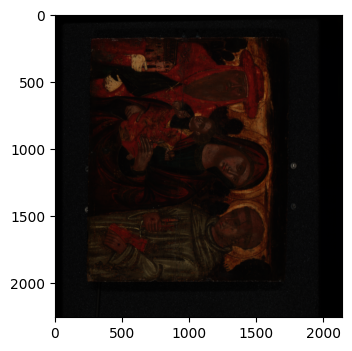

In [38]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = np.empty((lines, samples, 3), dtype=np.float32)
ch_1 = 250 # Wavelength 630.95nm
ch_2 = 171 # Wavelength 531.59nm
ch_3 = 100 # Wavelength 443.68nm
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)
plt.show()

-Select an area, e.g. red, a plot both VIS and IR spectra in one plot

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


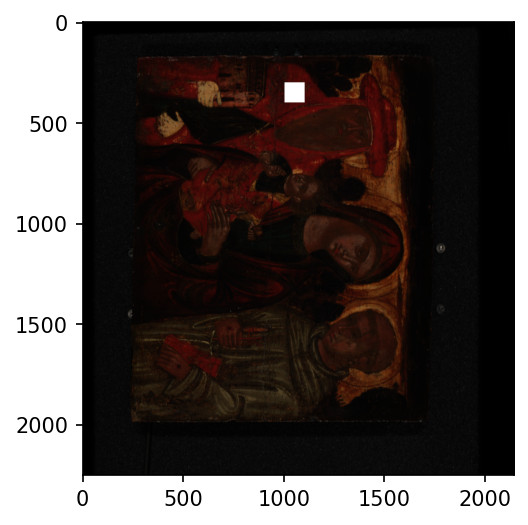

In [41]:
RGB2 = RGB.copy()
# Select red region
x1 = 1000
x2 = 1100
y1 = 300
y2 = 400
RGB2[y1:y2,x1:x2,0] = 1
RGB2[y1:y2,x1:x2,1] = 1
RGB2[y1:y2,x1:x2,2] = 1
sel = spectral_cube[y1:y2,:,x1:x2]
sel1 = np.sum(sel, axis = 0)
red_re = np.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB2)
plt.show()

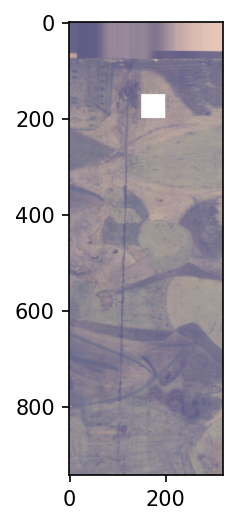

In [44]:
RGB3 = ir_RGB.copy()
x1 = 150
x2 = 200
y1 = 150
y2 = 200
RGB3[y1:y2,x1:x2,0] = 1
RGB3[y1:y2,x1:x2,1] = 1
RGB3[y1:y2,x1:x2,2] = 1
sel = spectral_image_ir[y1:y2,:,x1:x2]
sel2 = np.sum(sel, axis = 0)
red_re_ir = np.sum(sel2, axis =1)/((x2-x1)*(y2-y1))
plt.rcParams['figure.dpi'] = 150
plt.imshow(RGB3)
plt.show()

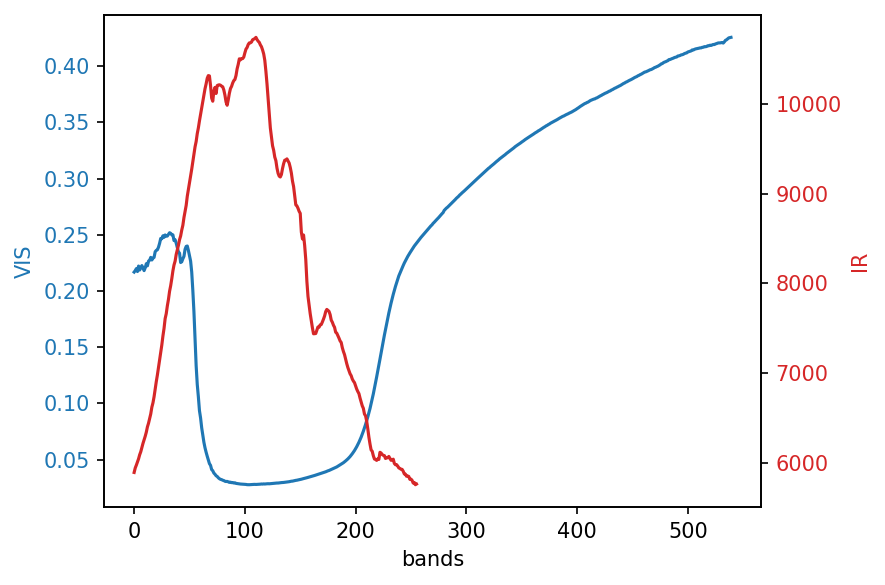

In [49]:
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('bands')
ax1.set_ylabel('VIS', color=color1)
ax1.plot(red_re, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:red'
ax2.set_ylabel('IR', color=color2)  # we already handled the x-label with ax1
ax2.plot(red_re_ir, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()